In [49]:
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from scipy.stats import norm
import os
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

In [50]:
def bs_call(S, K, T, r, vol):
    d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - np.exp(-r * T) * K * norm.cdf(d2)

def bs_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def implied_vol(S0, K, T, r, market_price, tol=0.0001):
    max_iter = 300 #max number of iterations
    vol_old = (np.abs(np.log(S0/(K*np.exp(-1 * r * T))))*(2/T))**0.5 #initial guess

    for k in range(max_iter):
        bs_price = bs_call(S0, K, T, r, vol_old)
        Cprime =  bs_vega(S0, K, T, r, vol_old)*100
        #print(bs_price, market_price)
        C = float(bs_price) - float(market_price)
        vol_new = vol_old - C/Cprime
        #print(k, Cprime, vol_new)
        bs_new = bs_call(S0, K, T, r, vol_new)

        if (abs(vol_old - vol_new) < tol or abs(bs_new - market_price) < tol):
            break

        vol_old = vol_new

    implied_vol = vol_old
    return implied_vol

C:\Users\USER\AppData\Local\Temp\ipykernel_13544\2652896496.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  k = float(row[1][1])
C:\Users\USER\AppData\Local\Temp\ipykernel_13544\2652896496.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price = float(row[1][2])


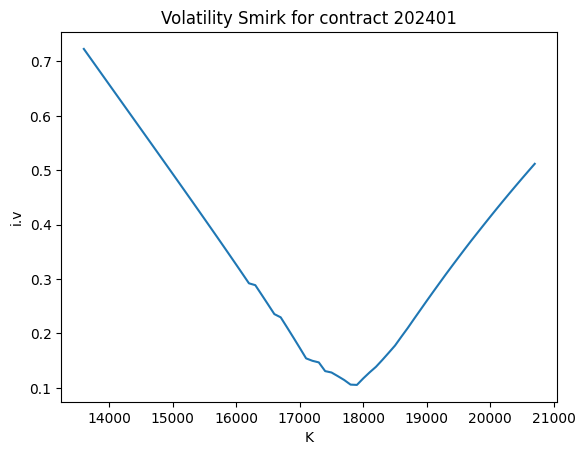

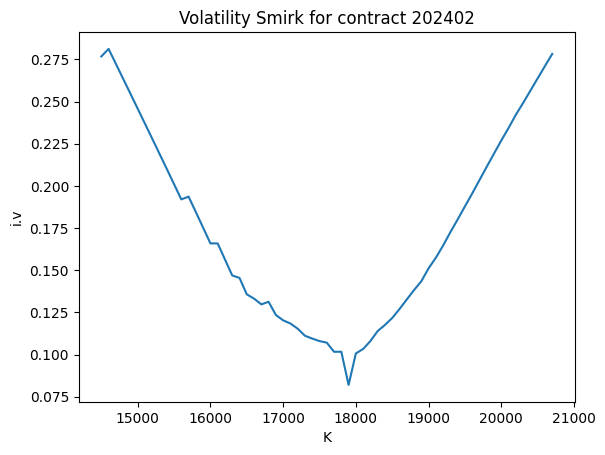

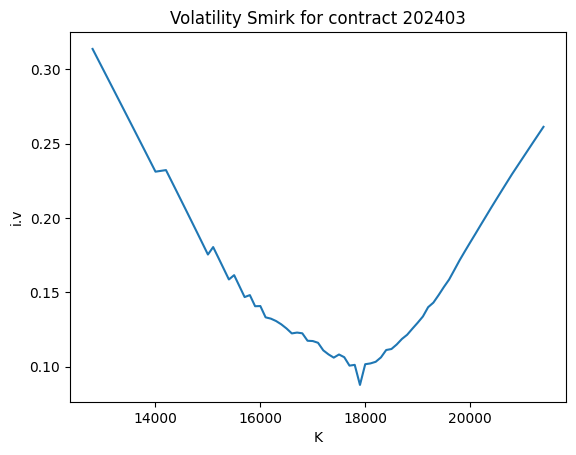

In [51]:
df = pd.read_csv('txo.csv', encoding='big5')
df = df[(df['買賣權'] == '買權') & (df['交易時段'] == '一般')]
df = df[['到期月份(週別)', '履約價', '結算價']]
month = ['202401', '202402', '202403']
set_date = ['2024_01_17', '2024_02_21', '2024_03_20']
s0 = 17853.76
r = 0.0122
for m, setd in zip(month, set_date):
    set = datetime(int(setd.split('_')[0]), int(setd.split('_')[1]), int(setd.split('_')[2]))
    time_difference = set - datetime(2024, 1, 2)
    t = time_difference.days / 252
    df_t = df[df['到期月份(週別)'] == m]
    strikes = []
    vols = []
    for row in df_t.iterrows():
        k = float(row[1][1])
        market_price = float(row[1][2])
        strikes.append(k)
        implied_vola= implied_vol(s0, k, t, r, market_price)
        vols.append(implied_vola)
    volss = pd.DataFrame({'vola' : vols, 
                        'k' : strikes})

    plt.plot(volss['k'], volss['vola'])
    plt.title(f'Volatility Smirk for contract {m}')
    plt.xlabel('K')
    plt.ylabel('i.v')
    plt.show()


202401


C:\Users\USER\AppData\Local\Temp\ipykernel_13544\3363966658.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  k = float(row[1][1])
C:\Users\USER\AppData\Local\Temp\ipykernel_13544\3363966658.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_price = float(row[1][2])


202402
202403
202401W1
202401W2
202406


C:\Users\USER\AppData\Local\Temp\ipykernel_13544\2714885968.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  vol_new = vol_old - C/Cprime
C:\Users\USER\AppData\Local\Temp\ipykernel_13544\2714885968.py:2: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
C:\Users\USER\AppData\Local\Temp\ipykernel_13544\2714885968.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


202409


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\series.py:953: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:177: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


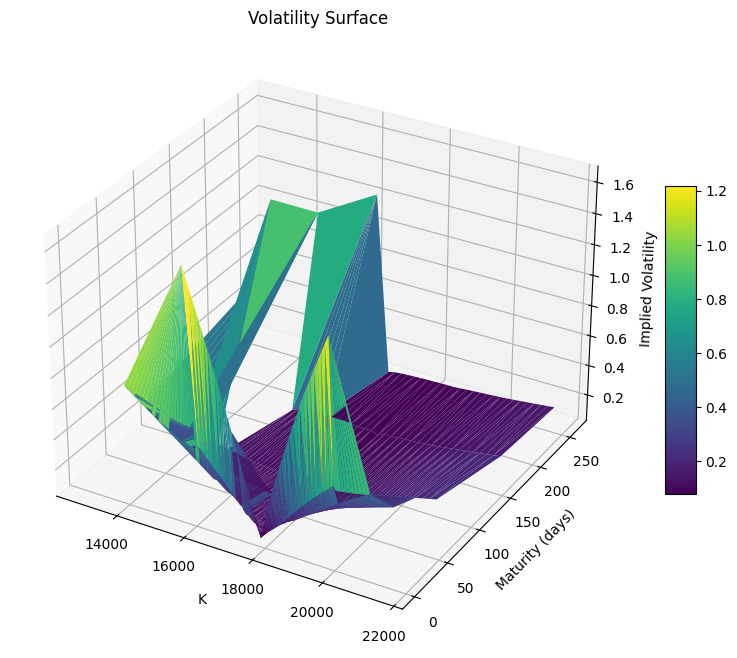

In [52]:
df = pd.read_csv('txo.csv', encoding='big5')
df = df[(df['買賣權'] == '買權') & (df["交易時段"] == '一般')]
df = df[["到期月份(週別)",'履約價', '結算價']]
month = ['202401', '202402', '202403', '202401W1', '202401W2', '202406', '202409']
set_date = ['2024_01_17', '2024_02_21', '2024_03_20', '2024_01_03', '2024_01_10', '2024_06_19', '2024_09_18'] 
s0 = 17853.76
r = 0.0122
result_df = pd.DataFrame()
for m, setd in zip(month, set_date):
    print(m)
    set = datetime(int(setd.split('_')[0]), int(setd.split('_')[1]), int(setd.split('_')[2]))
    time_difference = set - datetime(2024, 1, 2)
    t = time_difference.days / 252
    df_t = df[df['到期月份(週別)'] == m]
    strikes = []
    vols = []
    for row in df_t.iterrows():
        k = float(row[1][1])
        market_price = float(row[1][2])
        strikes.append(k)
        implied_vola =  implied_vol(s0, k, t, r, market_price)
        vols.append(implied_vola)
    volss = pd.DataFrame({'vola' : vols,
                            'k' : strikes,
                            'maturity' : [time_difference.days] * len(df_t)})
    try:
        result_df = pd.concat([result_df, volss], ignore_index=True)
    except:
        result_df = volss

result_df = result_df[result_df['vola']>0]
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_trisurf(result_df['k'], result_df['maturity'], result_df['vola'], cmap = plt.get_cmap('viridis'), shade=True) 
ax.set_title('Volatility Surface')
ax.set_xlabel('K')
ax.set_ylabel('Maturity (days)')
ax.set_zlabel('Implied Volatility')
fig.colorbar (surf, ax=ax, shrink=0.5, aspect=10)
plt.show()
